In [40]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [41]:
iris_dataset = load_iris()

In [42]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [43]:
import numpy as np
import pandas as pd 
df = pd.DataFrame(np.c_[iris_dataset['data'], iris_dataset['target']],
                 columns = iris_dataset['feature_names']+['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [44]:
df_reduced = df[["petal length (cm)", "petal width (cm)", "target"]]
df_reduced

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0
...,...,...,...
145,5.2,2.3,2.0
146,5.0,1.9,2.0
147,5.2,2.0,2.0
148,5.4,2.3,2.0


In [45]:
X_df = df_reduced[["petal length (cm)", "petal width (cm)"]]
Y_df = df_reduced['target']

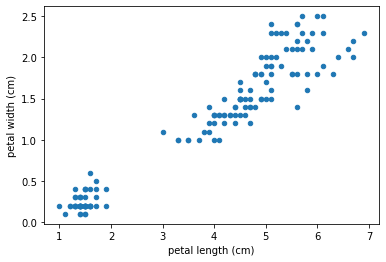

In [46]:
X_df.plot.scatter("petal length (cm)", "petal width (cm)")
plt.show()

In [47]:
from sklearn.linear_model import Perceptron
clf = Perceptron(max_iter = 1200, random_state = 40).fit(X_df, Y_df)

ValueError: x and y must have same first dimension, but have shapes (150,) and (1, 150)

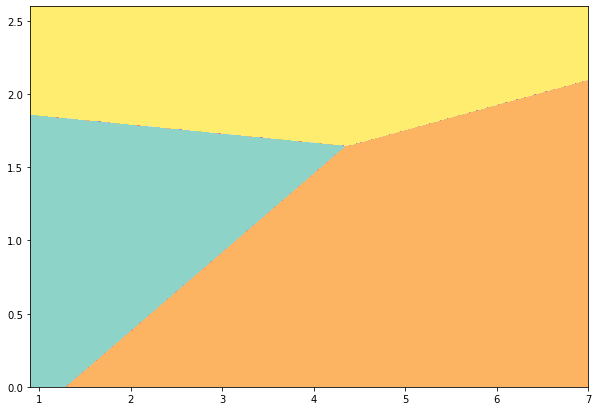

In [48]:
#Representación grafica del limite de decisión
X = X_df.values
mins = X.min(axis = 0)-0.1
maxs = X.max(axis = 0)+0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize =(10,7))
plt.contourf(xx, yy, Z, cmap = "Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),linewidths =0, colors = 'k')

plt.plot(X[:, 0],[Y_df ==0], X[:,1][Y_df ==0], 'bs', label="setosa")
plt.plot(X[:, 0],[Y_df ==1], X[:,1][Y_df ==1], 'go', label="versicolor")
plt.plot(X[:, 0],[Y_df ==2], X[:,1][Y_df ==2], 'r*', label="virginica")

plt.xlabel("petal_length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.legend(loc = "lower right", fontsize = 14)
plt.show()

In [49]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(X_df, Y_df)

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [50]:
#Numero de capas
clf.n_layers_

3

In [51]:
clf.hidden_layer_sizes

(100,)

In [52]:
#Num neuronas
clf.n_outputs_

3

In [53]:
#Numero de parametros 2 W que pasan por 100 capas
clf.coefs_[0].shape

(2, 100)

In [54]:
X_df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


ValueError: x and y must have same first dimension, but have shapes (150,) and (1, 150)

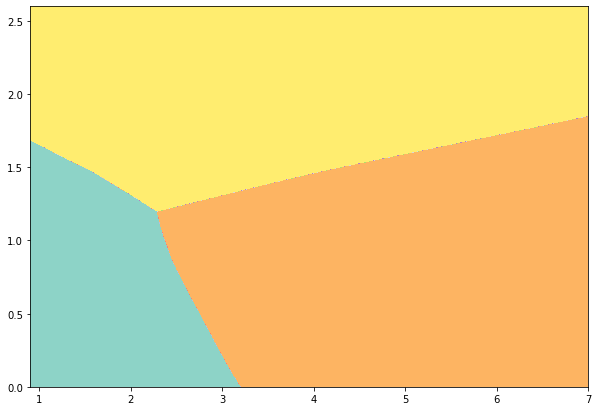

In [55]:
#Representación grafica del limite de decisión
X = X_df.values
mins = X.min(axis = 0)-0.1
maxs = X.max(axis = 0)+0.1

xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                    np.linspace(mins[1], maxs[1], 1000))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

fig = plt.figure(figsize =(10,7))
plt.contourf(xx, yy, Z, cmap = "Set3")
plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),linewidths =0, colors = 'k')

plt.plot(X[:, 0],[Y_df ==0], X[:,1][Y_df ==0], 'bs', label="setosa")
plt.plot(X[:, 0],[Y_df ==1], X[:,1][Y_df ==1], 'go', label="versicolor")
plt.plot(X[:, 0],[Y_df ==2], X[:,1][Y_df ==2], 'r*', label="virginica")

plt.xlabel("petal_length", fontsize = 14)
plt.ylabel("petal width", fontsize = 14)
plt.legend(loc = "lower right", fontsize = 14)
plt.show()

In [56]:
y_df = Y_df.reshape((-1,2))

AttributeError: 'Series' object has no attribute 'reshape'